# Bonus Track Assignment: Liquid State Machines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from lsm import *

In [2]:
solar_df = pd.read_csv('solar_data.csv', header=None)
solar_df.head()

input_data = solar_df.to_numpy().squeeze()

In [3]:
train, test = input_data[:2398], input_data[2398:] # train-test split

train_len = int(len(train) * 0.8)
train_data, val_data = train[:train_len], train[train_len:] # train-validation split

In [4]:
train_X, val_X, test_X = train_data[:-1], val_data[:-1], test[:-1] # input values for train, validation and test sets
train_Y, val_Y, test_Y = train_data[1:], val_data[1:], test[1:] # target values for train, validation and test sets

In [9]:
train_Y.shape

(1917,)

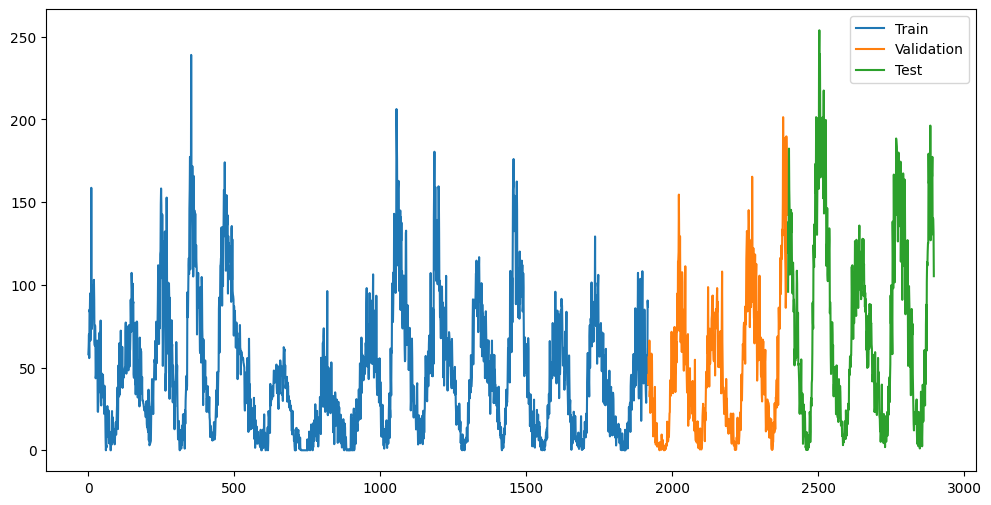

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, train_X.shape[0]), train_X, label='Train')
plt.plot(range(train_X.shape[0], train_X.shape[0] + val_X.shape[0]), val_X, label='Validation')
plt.plot(range(train_X.shape[0] + val_X.shape[0], train_X.shape[0] + val_X.shape[0] + test_X.shape[0]), test_X, label='Test')
plt.legend()

In [16]:
ranges_to_explore = {
    "Ni" : [100],
    "Ne" : [100],
    "win_e" : [3, 6],
    "win_i" : [1, 3],
    "w_e": [0.3, 0.6],
    "w_i": [0.7, 1.1]
}

mae, config = grid_search(ranges_to_explore, train_X, train_Y, val_X, val_Y)

24.449100613290067
24.131794853481278
22.801008339931357
23.2443033613549
23.786108968879137
25.811337440712276
24.338381935647035
23.14648635769241
21.63381073941525
21.881729329154215
21.204102601470357
21.513119279981776
20.737811567910107
22.552019134138824
21.775288109663844
21.28783647958352


In [17]:
mae, config

({'Ni': 100, 'Ne': 100, 'win_e': 6, 'win_i': 3, 'w_e': 0.3, 'w_i': 0.7},
 20.737811567910107)